In [1]:
# Add relevant Jupyter notebook extensions 

In [2]:
# You can double-check your Python path like this...
import sys  
import os
sys.path.append(os.path.abspath('..'))
print(sys.path)

['c:\\Program Files\\Python311\\python313.zip', 'c:\\Program Files\\Python311\\DLLs', 'c:\\Program Files\\Python311\\Lib', 'c:\\Program Files\\Python311', '', 'C:\\Users\\altaz\\AppData\\Roaming\\Python\\Python313\\site-packages', 'C:\\Users\\altaz\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32', 'C:\\Users\\altaz\\AppData\\Roaming\\Python\\Python313\\site-packages\\win32\\lib', 'C:\\Users\\altaz\\AppData\\Roaming\\Python\\Python313\\site-packages\\Pythonwin', 'c:\\Program Files\\Python311\\Lib\\site-packages', 'c:\\Users\\altaz\\session\\oxford\\engineering\\y3\\course\\1-engineering computation\\0-scientific coding\\practical\\b1-coding-practical-mt24']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

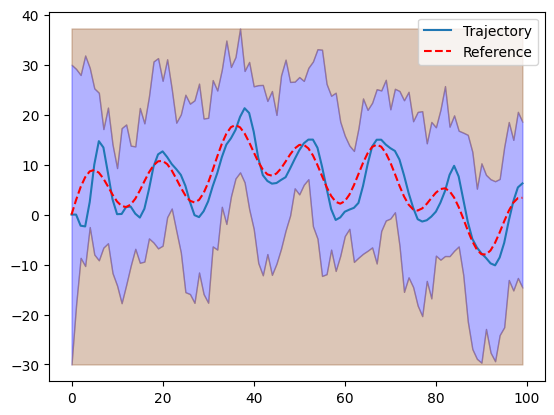

In [3]:
# Import relevant modules
from uuv_mission import Submarine, ClosedLoop, Mission, controller

sub = Submarine()
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("../data/mission.csv") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)